In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
# basic data handling and regular expressions
import pandas as pd
import re

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns  # using seaborn for better-looking plots

# scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # trying this simple classifier for text
from sklearn.metrics import classification_report  # for evaluating predictions
from sklearn.metrics import confusion_matrix  # shows false positives/negatives

# TF-IDF and stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text  # gives access to predefined stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  # default stopword set

In [3]:
# load dataset
IMDB_reviews_df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print("Dataset loaded successfully. Here's a quick look:")
IMDB_reviews_df.head()

Dataset loaded successfully. Here's a quick look:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# basic function to clean up the review text
def clean_text(review):
    # convert everything to lowercase so 'Great' and 'great' are same
    review = review.lower()
    
    # removes punctuation (keeps only words and spaces)
    review = re.sub(r'[^a-z\s]', '', review)
    
    # split into words
    words = review.split()
    
    # removes stopwords like 'the', 'is', 'was', etc.
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    
    # join the words back into a cleaned sentence
    return ' '.join(filtered_words)

IMDB_reviews_df['cleaned_review'] = IMDB_reviews_df['review'].apply(clean_text)
print("Cleaned text added to the dataset. Here's how it looks like now:")
IMDB_reviews_df[['review', 'cleaned_review']].head()

Cleaned text added to the dataset. Here's how it looks like now:


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,reviewers mentioned watching just oz episode y...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [5]:
# converting cleaned reviews into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

#transforms the text data into a matrix of TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(IMDB_reviews_df['cleaned_review'])

X = tfidf_matrix
y = IMDB_reviews_df['sentiment']

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Training the Model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



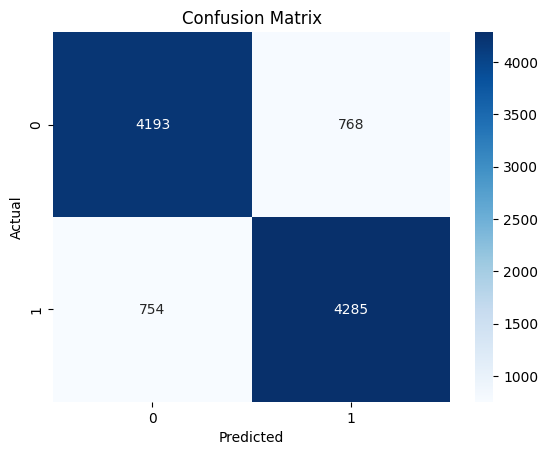

In [8]:
# Evaluation
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()